In [14]:
#Cách 2 :sử dụng Gradient descent:
#khai báo thư viện numpy, matp, sklearn 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [15]:
#X1: chiều cao và X2 : cân nặng
X1=np.array([[172,144,182,169,186,160,152 ]]).T
X2=np.array([[65,40,77,66,80,50,42 ]]).T
one = np.ones((X1.shape[0], 1))
Xbar = np.concatenate((one, X1,X2), axis = 1)
#giá trị thực bmi
y=np.array([[21.97,19.29,23.25,23.11,23.12,19.53,18.17]]).T

In [16]:
def cost(w):#giá trị hàm mất mát L
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2;#theo công thức

In [17]:
def grad(w):#giá trị đạo hàm của hàm L
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)#theo công thức dot(a,b)==a.dot(b)

In [18]:
# Hàm Gradient Descent
def gradient_descent(w_init, learning_rate, iters):
    w = [w_init] #ban đầu cho nghiệm là nghiệm khởi tạo
    for i in range(iters): #lặp
        w_new = w[-1] - learning_rate*grad(w[-1])#theo công thức => ngược dấu đạo hàm
        # mỗi lần cập nhật lại điểm W mới thì W[-1] là điểm mới nhất và dùng diểm đó để dịch tiếp
        if np.linalg.norm(grad(w_new))/len(w_new) < 0.001:
            break        # dừng khi đạo hàm rất rất nhỏ
        w.append(w_new) # cập nhật nghiệm mới vào
        # w là mảng tập hợp các nghiệm thì w[-1] sẽ là điểm mới nhất ở vòng lặp trước đó
        # w_new là nghiệm tìm được mới nhất sau khi dịch w[-1]
    return w # trả về các nghiệm theo dõi được
  # nếu muốn tìm nghiệm cuối cùng thôi thì return w[-1]

In [19]:
w_init = np.array([[40],[0],[0.5]])# khởi tạo nghiệm ban đầu
print(w_init)

[[40. ]
 [ 0. ]
 [ 0.5]]


In [20]:
# Chạy Gradient Descent với nghiệm ban đầu w_init thử 100 lần lặp và tốc độ đọc là 0.00001
theta = gradient_descent(w_init, 0.00001, 100)
w=theta[-1] # lấy nghiệm cuối cùng <=> chính xác nhất
print('Solution found by  Gradient Descent: w = ', w.T)

Solution found by  Gradient Descent: w =  [[39.99850996 -0.25753851  0.40028968]]


In [21]:
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)
print( 'Solution found by scikit-learn  : ', regr.coef_ )
# coef là hệ số tương quan

Solution found by scikit-learn  :  [[39.54473077 -0.23465761  0.34524524]]


In [22]:
predict=np.dot(Xbar,w)
print(predict.T)# in dự đoán sử dụng GD
print(y.T) # in kết quả bmi có sẵn ban đầu để so sanh
#Nghiệm tìm bằng Gradient Descent: w =  [[5.71619571e+247 9.59812104e+249 3.51851531e+249]]

[[21.72071601 18.92455215 23.94880714 22.89362122 24.11952216 18.80683286
  17.66482345]]
[[21.97 19.29 23.25 23.11 23.12 19.53 18.17]]


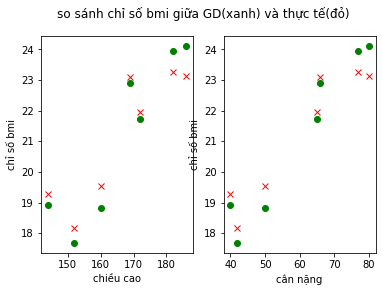

In [23]:
#vẽ hình so sánh:
plt.suptitle("so sánh chỉ số bmi giữa GD(xanh) và thực tế(đỏ)")
plt.subplot(1,2,1)
plt.xlabel("chiều cao")
plt.ylabel("chỉ số bmi")
plt.plot(X1,y,'rx')
plt.plot(X1,predict,'go')

plt.subplot(1,2,2)
plt.xlabel("cân nặng")
plt.ylabel("chỉ số bmi")
plt.plot(X2,y,'rx')#so sánh cân nặng
plt.plot(X2,predict,'go')
plt.show()